In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statistics import mean

In [2]:
df=load_boston()
features=pd.DataFrame(df.data,columns=df.feature_names)
#features=features.drop(['ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX', 'B'],axis=1)
#features=features.drop(['CHAS','TAX','INDUS','RAD','AGE','B'],axis=1)
#features=features.drop(['CHAS','CRIM','B','ZN','RAD','TAX','AGE'],axis=1)
#features=features.drop(['ZN'],axis=1)
target=pd.Series(df.target)

In [3]:
'''#feature selection according to my algo
feat=[]
erro=[]
for q in df.feature_names:
    #print(q)
    features=pd.DataFrame(df.data,columns=df.feature_names)
    target=pd.Series(df.target)
    feat.append(q)
    #print(features)
    features=features.drop([q],axis=1)
    #print(features)
    xscaler=MinMaxScaler()
    X=xscaler.fit_transform(np.array(features))
    yscaler=MinMaxScaler()
    y=yscaler.fit_transform(np.array(target).reshape(-1,1))
    for i in range(10):
        xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=i*5)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        ypred=model.predict(xtest)
        err.append(mean_squared_error(ypred,ytest))
    erro.append([mean(err),q])
#erro.sort()
erro'''

'#feature selection according to my algo\nfeat=[]\nerro=[]\nfor q in df.feature_names:\n    #print(q)\n    features=pd.DataFrame(df.data,columns=df.feature_names)\n    target=pd.Series(df.target)\n    feat.append(q)\n    #print(features)\n    features=features.drop([q],axis=1)\n    #print(features)\n    xscaler=MinMaxScaler()\n    X=xscaler.fit_transform(np.array(features))\n    yscaler=MinMaxScaler()\n    y=yscaler.fit_transform(np.array(target).reshape(-1,1))\n    for i in range(10):\n        xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=i*5)\n        model=LinearRegression()\n        model.fit(xtrain,ytrain)\n        ypred=model.predict(xtest)\n        err.append(mean_squared_error(ypred,ytest))\n    erro.append([mean(err),q])\n#erro.sort()\nerro'

In [4]:
xscaler=MinMaxScaler()
X=xscaler.fit_transform(np.array(features))
yscaler=MinMaxScaler()
y=yscaler.fit_transform(np.array(target).reshape(-1,1))

C:\Users\Bhagwan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


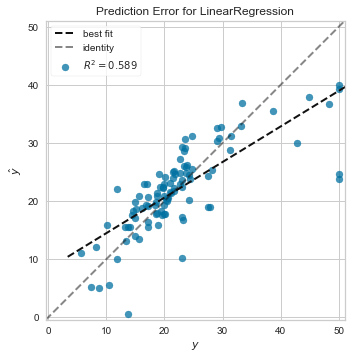

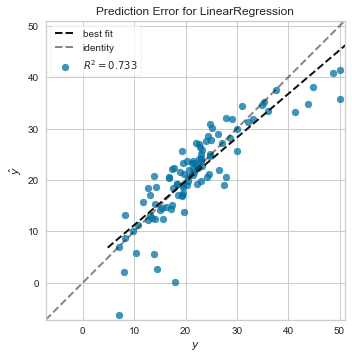

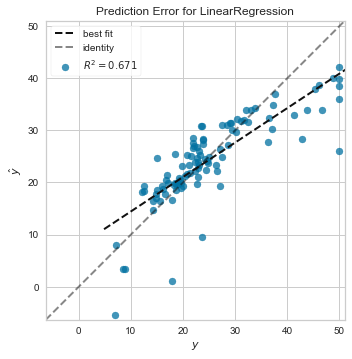

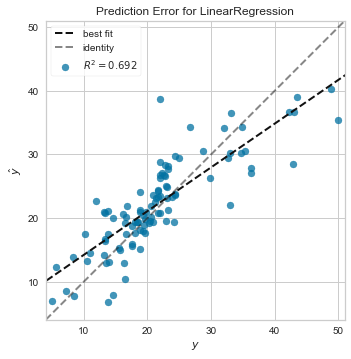

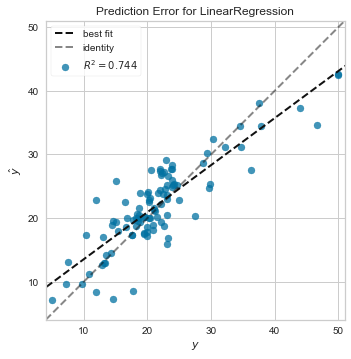

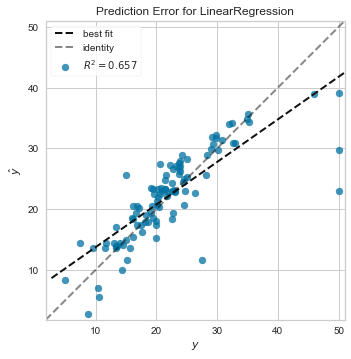

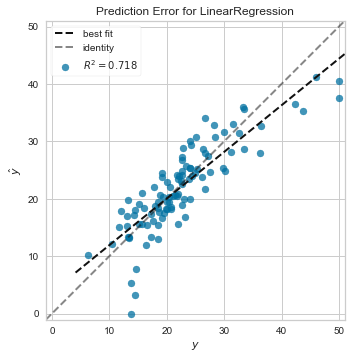

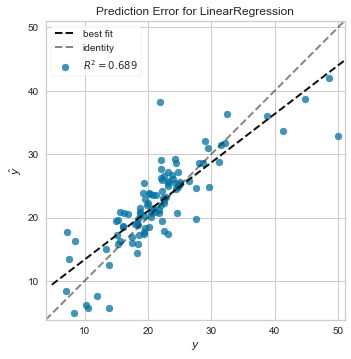

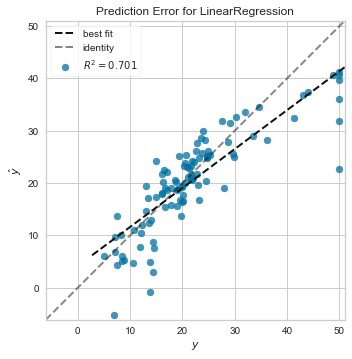

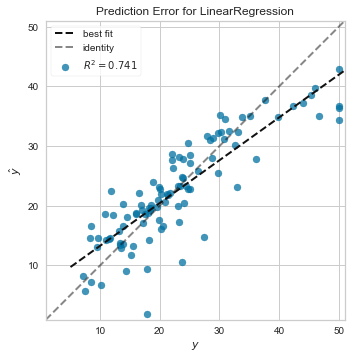

24.960317014693317

In [5]:
err=[]
for i in range(10):
    xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=i*5)
    model=LinearRegression()
    model.fit(xtrain,ytrain)
    from yellowbrick.regressor import PredictionError
    visualizer = PredictionError(model)
    
    visualizer.fit(xtrain, ytrain)  # Fit the training data to the visualizer
    visualizer.score(xtest, ytest)  # Evaluate the model on the test data
    visualizer.show()                 # Finalize and render the figure
    ypred=model.predict(xtest)
    err.append(mean_squared_error(ypred,ytest))
mean(err)

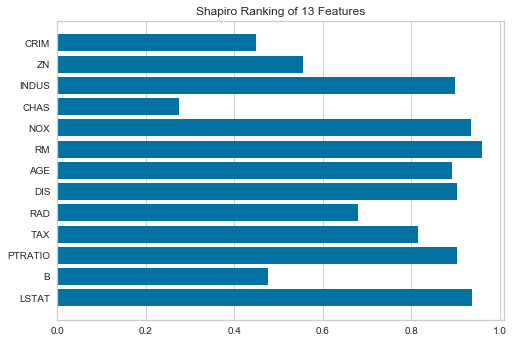

In [6]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(algorithm='shapiro',features=df.feature_names)

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

In [7]:
arr=visualizer.ranks_
score=[]
for i in range(len(arr)):
    score.append([arr[i],df.feature_names[i]])
score.sort()
score

[[0.27476078271865845, 'CHAS'],
 [0.4499647617340088, 'CRIM'],
 [0.4768242835998535, 'B'],
 [0.5559463500976562, 'ZN'],
 [0.6796415448188782, 'RAD'],
 [0.8152387738227844, 'TAX'],
 [0.8920142650604248, 'AGE'],
 [0.8997930288314819, 'INDUS'],
 [0.9032330513000488, 'DIS'],
 [0.9035935401916504, 'PTRATIO'],
 [0.9356354475021362, 'NOX'],
 [0.9369059205055237, 'LSTAT'],
 [0.9608720541000366, 'RM']]

In [8]:
from sklearn.feature_selection import RFE
estimator=LinearRegression()
selector = RFE(estimator)
selector = selector.fit(X, y)
k=selector.support_
selector.n_features_,selector.support_,selector.ranking_

C:\Users\Bhagwan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(6,
 array([ True, False, False, False,  True,  True, False,  True, False,
        False,  True, False,  True]),
 array([1, 4, 7, 6, 1, 1, 8, 1, 2, 3, 1, 5, 1]))

In [9]:
drop=[]
for i in range(len(k)):
    if(k[i]==False):
        drop.append(df.feature_names[i])
drop

['ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX', 'B']

In [10]:
normal=0.012326082476391775
rfe=0.013248476185743081
myalgo=0.018029373243538784

C:\Users\Bhagwan\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Bhagwan\anaconda3\lib\site-packages\yellowbrick\model_selection\importances.py:195: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


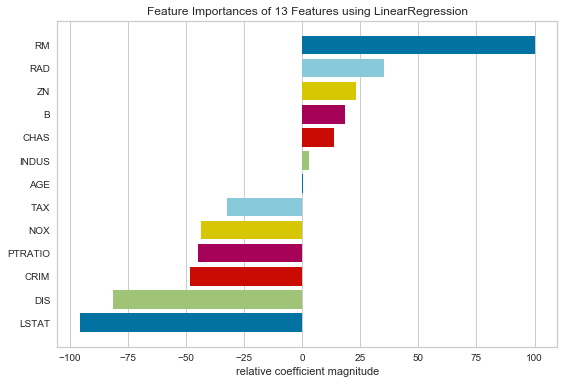

In [22]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(LinearRegression(),labels=df.feature_names)
viz.fit(X, y)
viz.show()

NameError: name 'X_train' is not defined